# TP Final - Aprendizaje de máquinas I (CEIA - FIUBA)

**Integrantes:**
- 
- 
- 
-
-
-
 

---

## Elección de tema: Modelo de Churn para clientes bancarios

In [369]:
# ---------------- Paquetes a utilizar ----------------

# Básicos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulación de datos | Métricas
from sklearn.preprocessing import StandardScaler # Reescalamiento de variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [370]:
# ---------------- Carga datos ----------------

churn_customer_train = pd.read_csv("./datasets/customer_churn_dataset-training-master.csv")
churn_customer_test = pd.read_csv("./datasets/customer_churn_dataset-testing-master.csv")

Detalle de variables

- **CustomerID:** Key único que identifica al cliente.
- **Edad:** Edad del cliente.
- **Sexo:** Sexo del cliente.
- **Permanencia:** Duración en meses durante la cual un cliente ha estado utilizando los productos o servicios de la empresa. 
- **Frecuencia de uso:** Número de veces que el cliente ha utilizado los servicios de la empresa en el último mes.
- **Llamadas de soporte:** Número de llamadas que el cliente realizó al servicio de atención al cliente en el último mes.
- **Retraso en el pago:** Número de días que el cliente ha demorado su pago en el último mes.
- **Tipo de suscripción:** Tipo de suscripción que tiene el cliente.
- **Duración del contrato:** Duración del contrato que el cliente ha firmado con la empresa.
- **Gasto total:** Cantidad total de dinero que el cliente ha gastado en los productos o servicios de la empresa.
- **Última interacción:** Número de días transcurridos desde la última interacción que el cliente tuvo con la empresa.
- **Churn:** Variable binaria que indica si un cliente se ha dado de baja (1) o no (0).


In [371]:
# Se hacen copias de los datos originales para trabajar
customer_train = churn_customer_train.copy()
customer_test = churn_customer_test.copy()

In [372]:
customer_train.info()
print('------------------------------------------------------')
customer_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total

In [373]:
customer_train.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [374]:
# Test no tiene nulos, train parece tener una fila toda vacía (nan) que hay que eliminar

print(customer_test.isnull().sum(axis = 0))
print('-----------------------------------')
print(customer_train.isnull().sum(axis = 0))

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
-----------------------------------
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [375]:
# Categorias de cada variable categórica

print(pd.unique(customer_train['Gender']))
print(pd.unique(customer_train['Subscription Type']))
print(pd.unique(customer_train['Contract Length']))

print('-----------------------------------')

print(pd.unique(customer_test['Gender']))
print(pd.unique(customer_test['Subscription Type']))
print(pd.unique(customer_test['Contract Length']))

['Female' 'Male' nan]
['Standard' 'Basic' 'Premium' nan]
['Annual' 'Monthly' 'Quarterly' nan]
-----------------------------------
['Female' 'Male']
['Basic' 'Standard' 'Premium']
['Monthly' 'Annual' 'Quarterly']


In [376]:
# Se limpia la fila vacía

print(customer_train.shape)
customer_train.dropna(inplace=True)
print(customer_train.shape)

(440833, 12)
(440832, 12)


In [377]:
# Variables categóricas que habría que transformar en dummy

customer_train.select_dtypes(include=['object'])

,Gender,Subscription Type,Contract Length
0,Female,Standard,Annual
1,Female,Basic,Monthly
2,Female,Basic,Quarterly
3,Male,Standard,Monthly
4,Male,Basic,Monthly
...,...,...,...
440828,Male,Premium,Annual
440829,Female,Premium,Annual
440830,Male,Standard,Quarterly
440831,Male,Standard,Quarterly


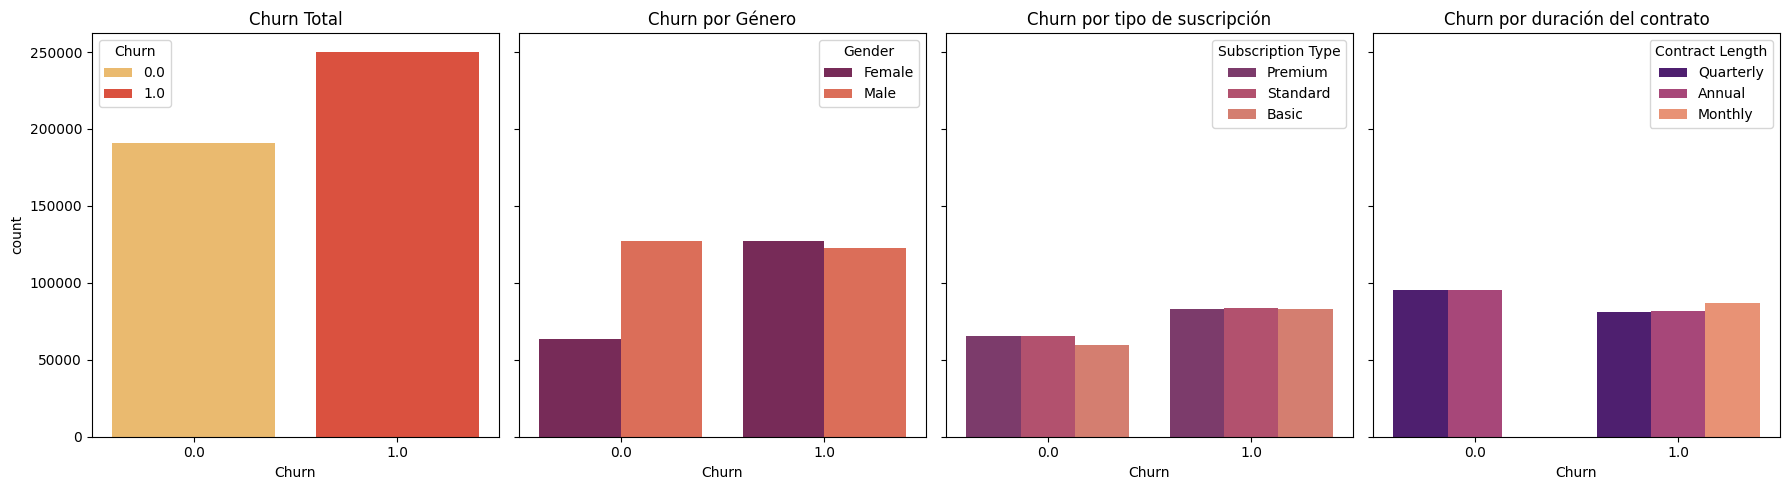

In [378]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)  # Crear subplots de una fila y tres columnas

# Paleta de colores de los distintos plots
pal1 = sns.color_palette("rocket", n_colors=2)
pal2 = sns.color_palette("flare_r", n_colors=3)
pal3 = sns.color_palette("magma", n_colors=3)

# Countplots para ver balance de variables
sns.countplot(data=customer_train, x="Churn", hue='Churn', palette=sns.color_palette("YlOrRd", n_colors=2), ax=axes[0])
axes[0].set_title('Churn Total')

sns.countplot(data=customer_train, x="Churn", hue='Gender', palette=pal1, ax=axes[1])
axes[1].set_title('Churn por Género')

sns.countplot(data=customer_train, x="Churn", hue='Subscription Type', palette=pal2, ax=axes[2])
axes[2].set_title('Churn por tipo de suscripción')

sns.countplot(data=customer_train, x="Churn", hue='Contract Length', palette=pal3, ax=axes[3])
axes[3].set_title('Churn por duración del contrato')

plt.tight_layout()
plt.show()

## Transformación de variables


In [379]:
# Transformaciones de variables categóricas a dummy

categorical_features = ['Gender','Subscription Type','Contract Length']

customer_train = pd.get_dummies(data=customer_train, 
                                  columns=categorical_features)

customer_test = pd.get_dummies(data=customer_test, 
                                  columns=categorical_features)

In [380]:
customer_test.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,25,14,4,27,598,9,1,True,False,True,False,False,False,True,False
1,2,41,28,28,7,13,584,20,0,True,False,False,False,True,False,True,False
2,3,47,27,10,2,29,757,21,0,False,True,False,True,False,True,False,False
3,4,35,9,12,5,17,232,18,0,False,True,False,True,False,False,False,True
4,5,53,58,24,9,2,533,18,0,True,False,False,False,True,True,False,False


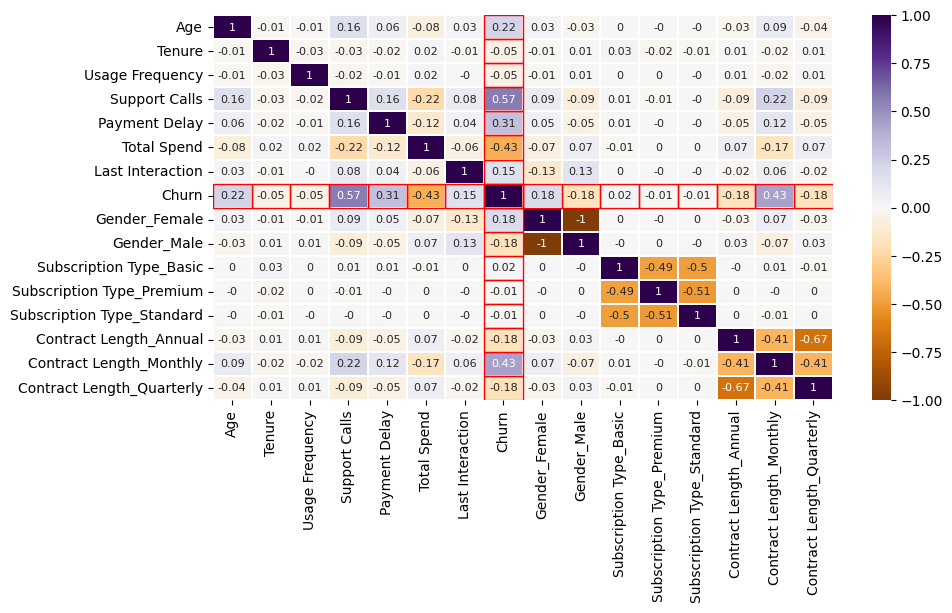

In [381]:
# Correlación entre variables

plt.figure(figsize=(10, 5))
corr_plot = customer_train.drop('CustomerID',axis=1).corr().round(2)
sns.heatmap(data=corr_plot, annot=True, annot_kws={"size": 8},cmap='PuOr', linewidth=.1);

highlight_var = 'Churn'
idvar = corr_plot.columns.get_loc(highlight_var)

# Para resaltar columna | fila de Churn

for i in range(len(corr_plot.columns)):
    plt.gca().add_patch(plt.Rectangle((idvar, i), 1, 1, fill=False, edgecolor='red', lw=1))
    plt.gca().add_patch(plt.Rectangle((i, idvar), 1, 1, fill=False, edgecolor='red', lw=1))

plt.show()

Las variables que parecen tener mayor correlación con la tasa de cancelación ('Churn') son: **Support Calls**, **Contract_Length_Monthly**, **Total_Spend** y **Payment Delay**.

**Correlación moderada entre Variables | Churn**

- La variable **Support Calls**, que refiere a la cantidad de llamadas que el cliente realiza a atención al cliente, presenta una correlación positiva ($0.57$) con la tasa de cancelación (y las más fuerte dentro del dataset analizado). Por lo general, la reiteración de llamadas por parte del cliente, además de incurrir en mayores costos a la empresa (i.e. *"dedicar tiempo de operadores a atender a los mismos clientes..."*), podría estar indicando ineficiencias tanto en la resolución de problemas o en la comunicación al cliente (que eventualmente podría impactar en la decisión de darse da baja).

- Con respecto a la duración del contrato, la opción *mensual* (**Contract_Length_Monthly**) parece estar mayormente asociada ($0.43$) con la tasa de cancelación, frente a otras opciones de *largo plazo* (i.e. Cuatrimestral | Anual), que presentan incluso correlación negativa con el *churn*.

- El gasto total (**Total Spend**) por parte del cliente en servicios | productos de la empresa, presenta una correlación negativa ($-0.43$) con respecto al Churn, dando una idea de que a medida que el cliente *invierte más*, menor es la posibilidad de darse de baja.

- La demora en el pago (**Payment Delay**) presenta correlación positiva ($0.31$) con la variable objetivo. Esto podría indicar una tendencia a retrasar el pago (o incluso no pagar) si el cliente decide darse de baja.

**Correlación débil entre Variables | Churn**

- La edad del cliente (**Age**) presenta una correlación positiva débil ($0.22$) con respecto al *churn*, dando una idea de que personas de mayor edad tienden a darse de baja del servicio | producto (sea cuál sea).

- En cuanto al género (**Gender_Female | Male**), se presenta mayor tendencia de baja en mujeres ($0.18$) que en hombres ($-0.18$), dados los signos de las correlaciones.

- La última interacción (**Last Interaction**) refleja que a mayor cantidad de días sin contacto con el cliente, mayor posibilidad de baja del mismo, dada la correlación positiva que presenta ($0.15$).

**Sin Correlación entre Variables | Churn**

- Las demás variables no presentan correlación alguna, por lo que no parecen ser relevantes en el análisis.


En este caso se utilizan las variables más correlacionadas con la tasa de cancelación (a efectos prácticos).


In [382]:
# ------------ Variables a utilizar ------------------

customer_train = customer_train.drop(['CustomerID','Tenure','Usage Frequency','Subscription Type_Basic','Subscription Type_Premium','Subscription Type_Standard'], axis=1)
customer_test = customer_test.drop(['CustomerID','Tenure','Usage Frequency','Subscription Type_Basic','Subscription Type_Premium','Subscription Type_Standard'], axis=1)

## Evaluación de modelos

### Modelo de regresión logística

Hay que separar las variables predichas | predictoras y eliminar una de las dummy (en cada categoría que tenga), para evitar correlación.

In [383]:
# ------------ Set de entrenamiento ------------------

X_train = customer_train.loc[:, ['Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender_Female', 'Contract Length_Annual', 'Contract Length_Monthly']].values
y_train = customer_train.loc[:, 'Churn'].values

# ------------ Set de testeo        ------------------

X_test = customer_test.loc[:, ['Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender_Female', 'Contract Length_Annual', 'Contract Length_Monthly']].values
y_test = customer_test.loc[:, 'Churn'].values

In [384]:
X_train.shape

(440832, 8)

In [385]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

In [386]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(random_state = 42, class_weight="balanced")
model_logistic.fit(X_train, y_train)

# Valores predichos con base de testeo
y_pred = model_logistic.predict(X_test)

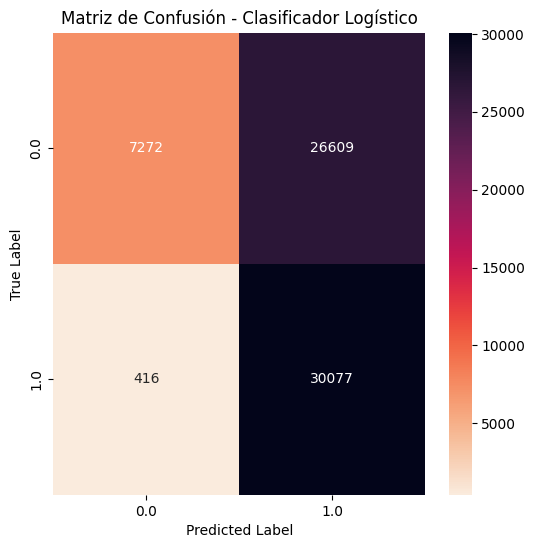

In [387]:
# Se crea la matriz de confusión
cm_logistic = confusion_matrix(y_test, y_pred)

# Paleta de colores
cmap = sns.color_palette("rocket_r", as_cmap=True)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap=cmap, 
            xticklabels=model_logistic.classes_, 
            yticklabels=model_logistic.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Matriz de Confusión - Clasificador Logístico")
plt.show()

In [388]:
print("Clasificador Regresión Logística - Métricas")
print("-------------------------------------------")
P = np.sum(cm_logistic[1, :]) # Positive
N = np.sum(cm_logistic[0, :]) # Negative
TP = cm_logistic[1, 1] # TP - True Positive | FP - False Positive
TN = cm_logistic[0, 0] # TN - True Negative | FN - False Negative
TPR = TP/P
TNR = TN/N

# Sensibilidad - Tasa de verdaderos positivos
print(f"Sensibilidad: {TP/P}")

# Especifidad - Tasa de verdaderos negativos
print(f"Especificidad: {TN/N}")

# Exactitud balanceada - Cuando hay desbalance, se promedian ambas tasas (Si es 0.5, el clasificador está adivinando)
print(f"Exactitud balanceada: {(TPR + TNR)/2}")

# Cuando la clase positiva tiene mas importancia que la negativa se puede usar precisión y recuperación
# Precisión - proporción de casos positivos correctamente identificados con respecto a todos los etiquetados positivos por el clasificador (TP / (TP + FP))
# Recuperación - proporción de casos positivos correctamente identificados con respecto a todos los positivos reales (TP / (TP + FN)) idem. 'sensibilidad'
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")

# F1 Score - Para tener un balance de ambos casos, tanto en precisión como en recuperación
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

Clasificador Regresión Logística - Métricas
-------------------------------------------
Sensibilidad: 0.9863575246777949
Especificidad: 0.21463357043770845
Exactitud balanceada: 0.6004955475577517
Precision: 0.5305895635606676
Recuperación: 0.9863575246777949
F1-score: 0.6900056206196447


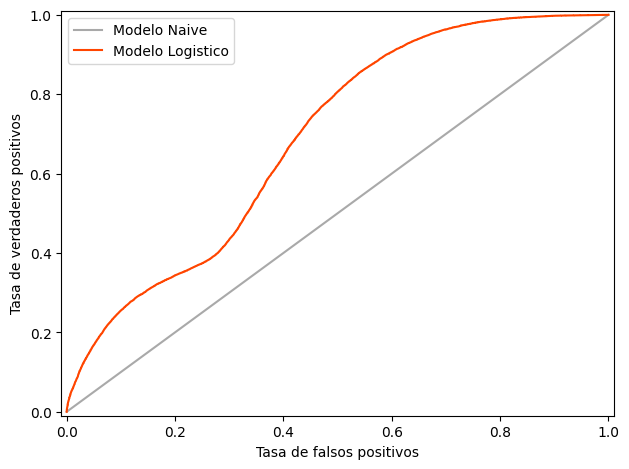

In [389]:
prob_total = model_logistic.predict_proba(X_test)[:,-1]
prob_naive = np.zeros_like(prob_total)

from sklearn.metrics import auc, roc_curve

fpr_naive, tpr_naive, _ = roc_curve(y_test, prob_naive)
fpr_total, tpr_total, _ = roc_curve(y_test, prob_total)

plt.plot(fpr_naive, tpr_naive, label="Modelo Naive", color = 'darkgray')
plt.plot(fpr_total, tpr_total, label="Modelo Logistico", color = 'orangered')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();


### Clasificador KNN

#### Selección de hiperaparámetros: RandomizedSearch

In [390]:
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Clasificador KNN con Algoritmo RandomSearch (para búsqueda de hiperparámetros)

classifier_knn = KNeighborsClassifier()

hyperparams = {"n_neighbors": np.arange(1, 31),        
               "weights": ["uniform", "distance"],  
               "p": np.arange(1.0, 10.0)}              

# Creamos un método de busqueda por grilla:
grid_random = RandomizedSearchCV(classifier_knn,
                                 hyperparams,
                                 n_iter=100, 
                                 refit=False,
                                 cv=3,
                                 scoring='f1',
                                 n_jobs=-1)

grid_random.fit(X_train, y_train)
'''

# Demora unos 63 mins. aprox. (63min 32.9seg)

'\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Clasificador KNN con Algoritmo RandomSearch (para búsqueda de hiperparámetros)\n\nclassifier_knn = KNeighborsClassifier()\n\nhyperparams = {"n_neighbors": np.arange(1, 31),        \n               "weights": ["uniform", "distance"],  \n               "p": np.arange(1.0, 10.0)}              \n\n# Creamos un método de busqueda por grilla:\ngrid_random = RandomizedSearchCV(classifier_knn,\n                                 hyperparams,\n                                 n_iter=100, \n                                 refit=False,\n                                 cv=3,\n                                 scoring=\'f1\',\n                                 n_jobs=-1)\n\ngrid_random.fit(X_train, y_train)\n'

In [391]:
'''grid_random.best_params_ #{'weights': 'distance', 'p': 6.0, 'n_neighbors': 4}'''

"grid_random.best_params_ #{'weights': 'distance', 'p': 6.0, 'n_neighbors': 4}"

In [392]:
'''
classifier_knn = KNeighborsClassifier(n_neighbors=4, metric="minkowski", p=6)
classifier_knn.fit(X_train, y_train)

#Evaluamos
y_pred  = classifier_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)

# Visualización de matriz de confusión

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=classifier_knn.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador KNN (23 vecinos)");

print("Clasificador KNN - Métricas")
print("-------------------------------------------")
P = np.sum(cm_knn[1, :]) # Positive
N = np.sum(cm_knn[0, :]) # Negative
TP = cm_knn[1, 1] # TP - True Positive | FP - False Positive
TN = cm_knn[0, 0] # TN - True Negative | FN - False Negative
TPR = TP/P
TNR = TN/N

# Sensibilidad - Tasa de verdaderos positivos
print(f"Sensibilidad: {TP/P}")

# Especifidad - Tasa de verdaderos negativos
print(f"Especificidad: {TN/N}")

# Exactitud balanceada - Cuando hay desbalance, se promedian ambas tasas (Si es 0.5, el clasificador está adivinando)
print(f"Exactitud balanceada: {(TPR + TNR)/2}")

# Cuando la clase positiva tiene mas importancia que la negativa se puede usar precisión y recuperación
# Precisión - proporción de casos positivos correctamente identificados con respecto a todos los etiquetados positivos por el clasificador (TP / (TP + FP))
# Recuperación - proporción de casos positivos correctamente identificados con respecto a todos los positivos reales (TP / (TP + FN)) idem. 'sensibilidad'
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")

# F1 Score - Para tener un balance de ambos casos, tanto en precisión como en recuperación
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

'''

'\nclassifier_knn = KNeighborsClassifier(n_neighbors=4, metric="minkowski", p=6)\nclassifier_knn.fit(X_train, y_train)\n\n#Evaluamos\ny_pred  = classifier_knn.predict(X_test)\ncm_knn = confusion_matrix(y_test, y_pred)\n\n# Visualización de matriz de confusión\n\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,\n                              display_labels=classifier_knn.classes_)\n\nfig, ax = plt.subplots(figsize=(6,6))\nax.grid(False)\ndisp.plot(ax=ax)\nax.set_title("Clasificador KNN (23 vecinos)");\n\nprint("Clasificador KNN - Métricas")\nprint("-------------------------------------------")\nP = np.sum(cm_knn[1, :]) # Positive\nN = np.sum(cm_knn[0, :]) # Negative\nTP = cm_knn[1, 1] # TP - True Positive | FP - False Positive\nTN = cm_knn[0, 0] # TN - True Negative | FN - False Negative\nTPR = TP/P\nTNR = TN/N\n\n# Sensibilidad - Tasa de verdaderos positivos\nprint(f"Sensibilidad: {TP/P}")\n\n# Especifidad - Tasa de verdaderos negativos\nprint(f"Especificidad: {TN/N}")\n\n# Exact

#### Selección de hiperaparámetros: GridSearch

In [393]:
'''
# Clasificador KNN con Algoritmo GridSearch (para búsqueda de hiperparámetros)
from sklearn.model_selection import GridSearchCV


classifier_knn = KNeighborsClassifier()

hyperparams = {"n_neighbors": np.arange(1, 30),    # Cantidad de vecinos.
               "weights": ["uniform", "distance"],  # Como se pesa los votos
               "p": np.arange(1.0, 30.0)}              # Valores para la distancia de Minkowski

# Creamos un método de busqueda por grilla:
grid = GridSearchCV(classifier_knn,
                    hyperparams,
                    refit=False,
                    cv=3,
                    scoring='f1',
                    n_jobs=-1)

grid.fit(X_train, y_train)
'''


'\n# Clasificador KNN con Algoritmo GridSearch (para búsqueda de hiperparámetros)\nfrom sklearn.model_selection import GridSearchCV\n\n\nclassifier_knn = KNeighborsClassifier()\n\nhyperparams = {"n_neighbors": np.arange(1, 30),    # Cantidad de vecinos.\n               "weights": ["uniform", "distance"],  # Como se pesa los votos\n               "p": np.arange(1.0, 30.0)}              # Valores para la distancia de Minkowski\n\n# Creamos un método de busqueda por grilla:\ngrid = GridSearchCV(classifier_knn,\n                    hyperparams,\n                    refit=False,\n                    cv=3,\n                    scoring=\'f1\',\n                    n_jobs=-1)\n\ngrid.fit(X_train, y_train)\n'

In [394]:
'''
#Evaluamos
y_pred  = classifier_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)

# Visualización

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=classifier_knn.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador KNN (23 vecinos)");

print("Clasificador KNN - Métricas")
print("-------------------------------------------")
P = np.sum(cm_knn[1, :]) # Positive
N = np.sum(cm_knn[0, :]) # Negative
TP = cm_knn[1, 1] # TP - True Positive | FP - False Positive
TN = cm_knn[0, 0] # TN - True Negative | FN - False Negative
TPR = TP/P
TNR = TN/N

# Sensibilidad - Tasa de verdaderos positivos
print(f"Sensibilidad: {TP/P}")

# Especifidad - Tasa de verdaderos negativos
print(f"Especificidad: {TN/N}")

# Exactitud balanceada - Cuando hay desbalance, se promedian ambas tasas (Si es 0.5, el clasificador está adivinando)
print(f"Exactitud balanceada: {(TPR + TNR)/2}")

# Cuando la clase positiva tiene mas importancia que la negativa se puede usar precisión y recuperación
# Precisión - proporción de casos positivos correctamente identificados con respecto a todos los etiquetados positivos por el clasificador (TP / (TP + FP))
# Recuperación - proporción de casos positivos correctamente identificados con respecto a todos los positivos reales (TP / (TP + FN)) idem. 'sensibilidad'
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")

# F1 Score - Para tener un balance de ambos casos, tanto en precisión como en recuperación
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")
'''

'\n#Evaluamos\ny_pred  = classifier_knn.predict(X_test)\ncm_knn = confusion_matrix(y_test, y_pred)\n\n# Visualización\n\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,\n                              display_labels=classifier_knn.classes_)\n\nfig, ax = plt.subplots(figsize=(6,6))\nax.grid(False)\ndisp.plot(ax=ax)\nax.set_title("Clasificador KNN (23 vecinos)");\n\nprint("Clasificador KNN - Métricas")\nprint("-------------------------------------------")\nP = np.sum(cm_knn[1, :]) # Positive\nN = np.sum(cm_knn[0, :]) # Negative\nTP = cm_knn[1, 1] # TP - True Positive | FP - False Positive\nTN = cm_knn[0, 0] # TN - True Negative | FN - False Negative\nTPR = TP/P\nTNR = TN/N\n\n# Sensibilidad - Tasa de verdaderos positivos\nprint(f"Sensibilidad: {TP/P}")\n\n# Especifidad - Tasa de verdaderos negativos\nprint(f"Especificidad: {TN/N}")\n\n# Exactitud balanceada - Cuando hay desbalance, se promedian ambas tasas (Si es 0.5, el clasificador está adivinando)\nprint(f"Exactitud balanceada: 

#### Selección de hiperaparámetros: Algoritmos Genéticos

In [395]:
import hyper_genalg as gen_lib

'''
classifier_knn = KNeighborsClassifier

hyperparams = {"n_neighbors": np.arange(1, 3),    # Cantidad de vecinos.
               "weights": ["uniform", "distance"],  # Como se pesan los votos
               "p": np.arange(1.0, 3)}          # Valores para la distancia de Minkowski

# Creamos un maétodo de busqueda por grilla:
best_params, best_cost = gen_lib.genetic_hyper(classifier_knn, X_train, y_train, hyperparams, cv=3, scoring='f1',
                                               max_iterations=15, number_initial_population=300, initial_temperature=10,
                                               cooling_rate=0.95, n_jobs=-1)

'''

'\nclassifier_knn = KNeighborsClassifier\n\nhyperparams = {"n_neighbors": np.arange(1, 3),    # Cantidad de vecinos.\n               "weights": ["uniform", "distance"],  # Como se pesan los votos\n               "p": np.arange(1.0, 3)}          # Valores para la distancia de Minkowski\n\n# Creamos un maétodo de busqueda por grilla:\nbest_params, best_cost = gen_lib.genetic_hyper(classifier_knn, X_train, y_train, hyperparams, cv=3, scoring=\'f1\',\n                                               max_iterations=15, number_initial_population=300, initial_temperature=10,\n                                               cooling_rate=0.95, n_jobs=-1)\n\n'

#### Selección de hiperaparámetros: Optuna

In [396]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 1, 31)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    p = trial.suggest_float("p", 1.0, 10.0)
    
    classifier_knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
    
    # Realizamos la validación cruzada
    score = cross_val_score(classifier_knn, X_train, y_train, cv=3, scoring='f1', n_jobs=-1)
    
    return score.mean()

def champion_callback(study, frozen_trial):
    """
    Mostramos menos información, sino es demasiado verboso
    """

    winner = study.user_attrs.get("winner", None)

    if study.best_value and winner != study.best_value:
        study.set_user_attr("winner", study.best_value)
        if winner:
            improvement_percent = (abs(winner - study.best_value) / study.best_value) * 100
            print(
                f"Trial {frozen_trial.number} achieved value: {frozen_trial.value} with "
                f"{improvement_percent: .4f}% improvement"
            )
        else:
            print(f"Initial trial {frozen_trial.number} achieved value: {frozen_trial.value}")

In [397]:
# Creamos un estudio de Optuna

'''
optuna.logging.set_verbosity(optuna.logging.ERROR) # Solo mostrar errores y outputs de cada línea

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5000, callbacks=[champion_callback])
'''

'\noptuna.logging.set_verbosity(optuna.logging.ERROR) # Solo mostrar errores y outputs de cada línea\n\nstudy = optuna.create_study(direction="maximize")\nstudy.optimize(objective, n_trials=5000, callbacks=[champion_callback])\n'

### SVC - Support Vector Clasification

In [398]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [399]:
'''
from sklearn.model_selection import GridSearchCV

svm_linear = SVC(kernel='linear')

grid = GridSearchCV(svm_linear,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100]},
                    refit=False,
                    cv=5,
                    scoring='accuracy')

grid.fit(X_train,y_train)
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\nsvm_linear = SVC(kernel=\'linear\')\n\ngrid = GridSearchCV(svm_linear,\n                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100]},\n                    refit=False,\n                    cv=5,\n                    scoring=\'accuracy\')\n\ngrid.fit(X_train,y_train)\n'

### Árboles de clasificación

In [400]:
'''
from sklearn.tree import DecisionTreeClassifier

# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)
'''

"\nfrom sklearn.tree import DecisionTreeClassifier\n\n# Creamos el arbol\nclassification = DecisionTreeClassifier(criterion='entropy', splitter='best', \n                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, \n                                        random_state=42)\n# Y entrenamos\nclassification.fit(X_train, y_train)\n"

In [401]:
'''classification.get_params()'''

'classification.get_params()'

In [402]:
'''customer_train.columns'''

'customer_train.columns'

In [403]:
from sklearn.tree import export_graphviz

'''
export_graphviz(classification, out_file = "arbol_clasificacion_churn.dot",
                feature_names=['Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender_Female', 'Contract Length_Annual', 'Contract Length_Monthly'],
                class_names=["Recuperado", "Baja"],
                rounded=True,
                filled=True)
'''

'\nexport_graphviz(classification, out_file = "arbol_clasificacion_churn.dot",\n                feature_names=[\'Age\', \'Support Calls\', \'Payment Delay\', \'Total Spend\', \'Last Interaction\', \'Gender_Female\', \'Contract Length_Annual\', \'Contract Length_Monthly\'],\n                class_names=["Recuperado", "Baja"],\n                rounded=True,\n                filled=True)\n'

In [404]:
'''
y_pred_train = classification.predict(X_train)
y_pred = classification.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1 = f1_score(y_test, y_pred)

print(f"F1-score de entrenamiento fue: {f1_train}")
print(f"F1-score de testeo fue: {f1}")
'''

'\ny_pred_train = classification.predict(X_train)\ny_pred = classification.predict(X_test)\n\nf1_train = f1_score(y_train, y_pred_train)\nf1 = f1_score(y_test, y_pred)\n\nprint(f"F1-score de entrenamiento fue: {f1_train}")\nprint(f"F1-score de testeo fue: {f1}")\n'

Búsqueda de hiperparámetros con Optuna

In [405]:
import optuna 

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 30)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

    classifier = DecisionTreeClassifier(criterion=criterion, splitter='best', 
                                        max_depth=max_depth, min_samples_split=min_samples_split, 
                                        min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Realizamos la validación cruzada
    score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
    
    return score.mean()

def champion_callback(study, frozen_trial):
    """
    Mostramos menos información, sino es demasiado verboso
    """
    winner = study.user_attrs.get("winner", None)
    if study.best_value and winner != study.best_value:
        study.set_user_attr("winner", study.best_value)
        if winner:
            improvement_percent = (abs(winner - study.best_value) / study.best_value) * 100
            print(
                f"Trial {frozen_trial.number} achieved value: {frozen_trial.value} with "
                f"{improvement_percent: .4f}% improvement"
            )
        else:
            print(f"Initial trial {frozen_trial.number} achieved value: {frozen_trial.value}")

In [406]:
# Creamos un estudio de Optuna
'''
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, callbacks=[champion_callback])
'''

'\noptuna.logging.set_verbosity(optuna.logging.ERROR)\n\nstudy = optuna.create_study(direction="maximize")\nstudy.optimize(objective, n_trials=10, callbacks=[champion_callback])\n'

In [407]:
'''best_params = study.best_params
best_params'''

'best_params = study.best_params\nbest_params'

In [408]:
'''# Creamos el arbol
tree_classification = DecisionTreeClassifier(**best_params, random_state=42)
# Y entrenamos
tree_classification.fit(X_train, y_train)'''

'# Creamos el arbol\ntree_classification = DecisionTreeClassifier(**best_params, random_state=42)\n# Y entrenamos\ntree_classification.fit(X_train, y_train)'

In [409]:
'''#Evaluamos
y_pred  = tree_classification.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred)

# Visualización

disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,
                              display_labels=tree_classification.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Tree");

print("Clasificador Tree - Métricas")
print("-------------------------------------------")
P = np.sum(cm_tree[1, :]) # Positive
N = np.sum(cm_tree[0, :]) # Negative
TP = cm_tree[1, 1] # TP - True Positive | FP - False Positive
TN = cm_tree[0, 0] # TN - True Negative | FN - False Negative
TPR = TP/P
TNR = TN/N

# Sensibilidad - Tasa de verdaderos positivos
print(f"Sensibilidad: {TP/P}")

# Especifidad - Tasa de verdaderos negativos
print(f"Especificidad: {TN/N}")

# Exactitud balanceada - Cuando hay desbalance, se promedian ambas tasas (Si es 0.5, el clasificador está adivinando)
print(f"Exactitud balanceada: {(TPR + TNR)/2}")

# Cuando la clase positiva tiene mas importancia que la negativa se puede usar precisión y recuperación
# Precisión - proporción de casos positivos correctamente identificados con respecto a todos los etiquetados positivos por el clasificador (TP / (TP + FP))
# Recuperación - proporción de casos positivos correctamente identificados con respecto a todos los positivos reales (TP / (TP + FN)) idem. 'sensibilidad'
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")

# F1 Score - Para tener un balance de ambos casos, tanto en precisión como en recuperación
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")'''

'#Evaluamos\ny_pred  = tree_classification.predict(X_test)\ncm_tree = confusion_matrix(y_test, y_pred)\n\n# Visualización\n\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,\n                              display_labels=tree_classification.classes_)\n\nfig, ax = plt.subplots(figsize=(6,6))\nax.grid(False)\ndisp.plot(ax=ax)\nax.set_title("Clasificador Tree");\n\nprint("Clasificador Tree - Métricas")\nprint("-------------------------------------------")\nP = np.sum(cm_tree[1, :]) # Positive\nN = np.sum(cm_tree[0, :]) # Negative\nTP = cm_tree[1, 1] # TP - True Positive | FP - False Positive\nTN = cm_tree[0, 0] # TN - True Negative | FN - False Negative\nTPR = TP/P\nTNR = TN/N\n\n# Sensibilidad - Tasa de verdaderos positivos\nprint(f"Sensibilidad: {TP/P}")\n\n# Especifidad - Tasa de verdaderos negativos\nprint(f"Especificidad: {TN/N}")\n\n# Exactitud balanceada - Cuando hay desbalance, se promedian ambas tasas (Si es 0.5, el clasificador está adivinando)\nprint(f"Exactitud balancead

In [410]:
from sklearn.metrics import RocCurveDisplay

'''    
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_estimator(tree_classification, X_test, y_test, ax=ax)

plt.show();
'''

'    \nfig, ax = plt.subplots(figsize=(5,5))\nsvc_disp = RocCurveDisplay.from_estimator(tree_classification, X_test, y_test, ax=ax)\n\nplt.show();\n'

### Redes neuronales

In [411]:
#pip install torch torchvision torchaudio
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [412]:
import torch

In [413]:
customer_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        440832 non-null  float64
 1   Support Calls              440832 non-null  float64
 2   Payment Delay              440832 non-null  float64
 3   Total Spend                440832 non-null  float64
 4   Last Interaction           440832 non-null  float64
 5   Churn                      440832 non-null  float64
 6   Gender_Female              440832 non-null  bool   
 7   Gender_Male                440832 non-null  bool   
 8   Contract Length_Annual     440832 non-null  bool   
 9   Contract Length_Monthly    440832 non-null  bool   
 10  Contract Length_Quarterly  440832 non-null  bool   
dtypes: bool(5), float64(6)
memory usage: 25.6 MB


In [415]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

boolean_columns = ['Gender_Female', 'Gender_Male', 'Contract Length_Annual', 'Contract Length_Monthly', 'Contract Length_Quarterly']
customer_train[boolean_columns] = customer_train[boolean_columns].astype(int)

# Se dividen variables predictoras / objetivo
X = customer_train.drop('Churn', axis=1).values
y = customer_train['Churn'].values

# Escalamiento de valores
scaler = StandardScaler()
X[:, :5] = scaler.fit_transform(X[:, :5])

# Entrenamiento y  validaci[on] (si bien después hay un df apartado de test), es un set de validación intermedia
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Se pasa todo a tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Se define clase del modelo
class ChurnModel(nn.Module):
    def __init__(self):
        super(ChurnModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Modelo
model = ChurnModel()

# Función de pérdida y optimizador
criterion = nn.BCELoss()  # Usamos entropía cruzada binaria
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Para que vaya imprimiendo en pantalla a medida que avanza
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluación del modelo
model.eval()
with torch.no_grad():
    y_pred = model(X_val)
    y_pred = (y_pred > 0.5).float() # Tansformación a binario, con umbral 0.5
    accuracy = (y_pred.eq(y_val).sum() / float(y_val.shape[0])).item()
    print(f'Accuracy: {accuracy:.4f}')

Epoch [10/1000], Loss: 0.6620
Epoch [20/1000], Loss: 0.6102
Epoch [30/1000], Loss: 0.5441
Epoch [40/1000], Loss: 0.4676
Epoch [50/1000], Loss: 0.3944
Epoch [60/1000], Loss: 0.3354
Epoch [70/1000], Loss: 0.2930
Epoch [80/1000], Loss: 0.2630
Epoch [90/1000], Loss: 0.2401
Epoch [100/1000], Loss: 0.2212
Epoch [110/1000], Loss: 0.2049
Epoch [120/1000], Loss: 0.1905
Epoch [130/1000], Loss: 0.1777
Epoch [140/1000], Loss: 0.1663
Epoch [150/1000], Loss: 0.1561
Epoch [160/1000], Loss: 0.1471
Epoch [170/1000], Loss: 0.1392
Epoch [180/1000], Loss: 0.1322
Epoch [190/1000], Loss: 0.1261
Epoch [200/1000], Loss: 0.1207
Epoch [210/1000], Loss: 0.1161
Epoch [220/1000], Loss: 0.1122
Epoch [230/1000], Loss: 0.1087
Epoch [240/1000], Loss: 0.1057
Epoch [250/1000], Loss: 0.1031
Epoch [260/1000], Loss: 0.1008
Epoch [270/1000], Loss: 0.0987
Epoch [280/1000], Loss: 0.0968
Epoch [290/1000], Loss: 0.0951
Epoch [300/1000], Loss: 0.0935
Epoch [310/1000], Loss: 0.0920
Epoch [320/1000], Loss: 0.0905
Epoch [330/1000],

In [416]:
cm_torch = confusion_matrix(y_val, y_pred)

P = np.sum(cm_torch[1, :])  # Positive
N = np.sum(cm_torch[0, :])  # Negative
TP = cm_torch[1, 1]         # True Positive
TN = cm_torch[0, 0]         # True Negative
FP = cm_torch[0, 1]         # False Positive
FN = cm_torch[1, 0]         # False Negative

# Tasa de Verdaderos Positivos (Sensitivity, Recall)
TPR = TP / P if P != 0 else 0

# Tasa de Verdaderos Negativos (Specificity)
TNR = TN / N if N != 0 else 0

# Imprimir las métricas
print(f'P (Positives): {P}')
print(f'N (Negatives): {N}')
print(f'TP (True Positives): {TP}')
print(f'TN (True Negatives): {TN}')
print(f'TPR (True Positive Rate / Sensitivity): {TPR:.5f}')
print(f'TNR (True Negative Rate / Specificity): {TNR:.5f}')

print(f"Precision: {precision_score(y_val, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_val, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_val, y_pred, zero_division=0)}")

P (Positives): 50104
N (Negatives): 38063
TP (True Positives): 49316
TN (True Negatives): 38037
TPR (True Positive Rate / Sensitivity): 0.98427
TNR (True Negative Rate / Specificity): 0.99932
Precision: 0.9994730655425398
Recuperación: 0.9842727127574644
F1-score: 0.9918146531786095


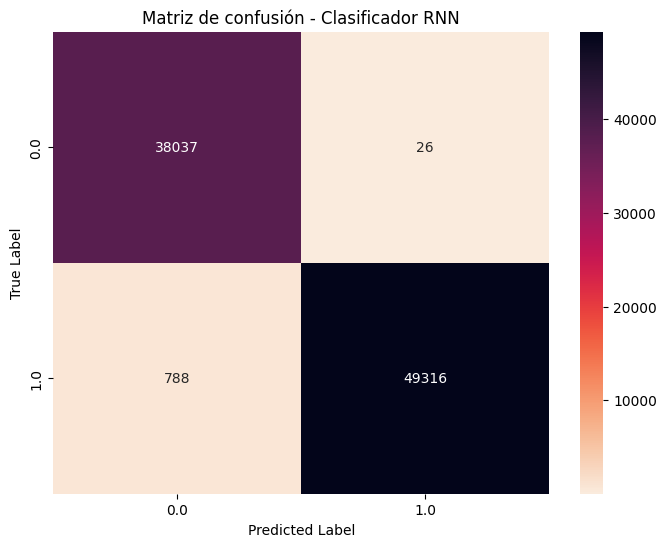

In [417]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_torch, annot=True, fmt='d', xticklabels=[0.0, 1.0], 
            yticklabels=[0.0, 1.0], cmap='rocket_r')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de confusión - Clasificador RNN')
plt.show()

In [419]:
# Ahora utilizamos toda la partición para el entrenamiento y testeamos con el y_test

boolean_columns = ['Gender_Female', 'Gender_Male', 'Contract Length_Annual', 'Contract Length_Monthly', 'Contract Length_Quarterly']
customer_train[boolean_columns] = customer_train[boolean_columns].astype(int)
customer_test[boolean_columns] = customer_train[boolean_columns].astype(int)

# Se dividen variables predictoras / objetivo
X_train = customer_train.drop('Churn', axis=1).values
y_train = customer_train['Churn'].values

X_test = customer_test.drop('Churn', axis=1).values
y_test = customer_test['Churn'].values

# Escalamiento de valores
scaler = StandardScaler()
X_train[:, :5] = scaler.fit_transform(X_train[:, :5])
X_test[:, :5] = scaler.fit_transform(X_test[:, :5])

# Se pasa todo a tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Se define clase del modelo
class ChurnModel(nn.Module):
    def __init__(self):
        super(ChurnModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Modelo
model = ChurnModel()

# Función de pérdida y optimizador
criterion = nn.BCELoss()  # Usamos entropía cruzada binaria
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Para que vaya imprimiendo en pantalla a medida que avanza
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluación del modelo
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float() # Tansformación a binario, con umbral 0.5
    accuracy = (y_pred.eq(y_test).sum() / float(y_test.shape[0])).item()
    print(f'Accuracy: {accuracy:.4f}')


Epoch [10/1000], Loss: 0.6330
Epoch [20/1000], Loss: 0.5745
Epoch [30/1000], Loss: 0.5061
Epoch [40/1000], Loss: 0.4320
Epoch [50/1000], Loss: 0.3626
Epoch [60/1000], Loss: 0.3074
Epoch [70/1000], Loss: 0.2680
Epoch [80/1000], Loss: 0.2403
Epoch [90/1000], Loss: 0.2194
Epoch [100/1000], Loss: 0.2022
Epoch [110/1000], Loss: 0.1872
Epoch [120/1000], Loss: 0.1739
Epoch [130/1000], Loss: 0.1620
Epoch [140/1000], Loss: 0.1512
Epoch [150/1000], Loss: 0.1417
Epoch [160/1000], Loss: 0.1333
Epoch [170/1000], Loss: 0.1260
Epoch [180/1000], Loss: 0.1197
Epoch [190/1000], Loss: 0.1143
Epoch [200/1000], Loss: 0.1095
Epoch [210/1000], Loss: 0.1052
Epoch [220/1000], Loss: 0.1015
Epoch [230/1000], Loss: 0.0981
Epoch [240/1000], Loss: 0.0950
Epoch [250/1000], Loss: 0.0922
Epoch [260/1000], Loss: 0.0895
Epoch [270/1000], Loss: 0.0871
Epoch [280/1000], Loss: 0.0847
Epoch [290/1000], Loss: 0.0825
Epoch [300/1000], Loss: 0.0805
Epoch [310/1000], Loss: 0.0785
Epoch [320/1000], Loss: 0.0767
Epoch [330/1000],

In [420]:
cm_torch = confusion_matrix(y_test, y_pred)

P = np.sum(cm_torch[1, :])  # Positive
N = np.sum(cm_torch[0, :])  # Negative
TP = cm_torch[1, 1]         # True Positive
TN = cm_torch[0, 0]         # True Negative
FP = cm_torch[0, 1]         # False Positive
FN = cm_torch[1, 0]         # False Negative

# Tasa de Verdaderos Positivos (Sensitivity, Recall)
TPR = TP / P if P != 0 else 0

# Tasa de Verdaderos Negativos (Specificity)
TNR = TN / N if N != 0 else 0

# Imprimir las métricas
print(f'P (Positives): {P}')
print(f'N (Negatives): {N}')
print(f'TP (True Positives): {TP}')
print(f'TN (True Negatives): {TN}')
print(f'TPR (True Positive Rate / Sensitivity): {TPR:.5f}')
print(f'TNR (True Negative Rate / Specificity): {TNR:.5f}')

print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")

P (Positives): 30493
N (Negatives): 33881
TP (True Positives): 25874
TN (True Negatives): 8718
TPR (True Positive Rate / Sensitivity): 0.84852
TNR (True Negative Rate / Specificity): 0.25731
Precision: 0.5069655348080804
Recuperación: 0.8485226117469583
F1-score: 0.6347111492702073


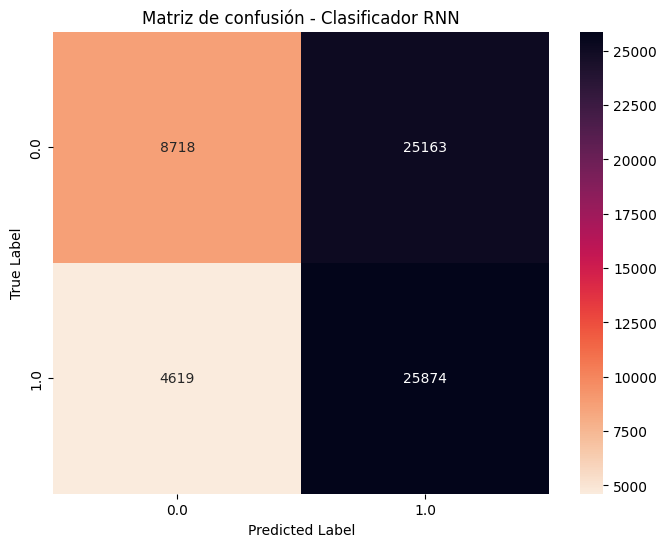

In [421]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_torch, annot=True, fmt='d', xticklabels=[0.0, 1.0], 
            yticklabels=[0.0, 1.0], cmap='rocket_r')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de confusión - Clasificador RNN')
plt.show()